In [1]:
import glob
import os
import warnings
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import math

In [2]:
warnings.simplefilter(action="ignore",category=Warning)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

In [3]:
adata = sc.read_h5ad("./02adata_bbknnall.h5ad")

In [4]:
adata2 = sc.read_h5ad("./03adata_infercnvall.h5ad")

In [5]:
adata.obs['cell_name'] = adata.obs_names
adata2.obs['cell_name'] = adata2.obs_names

In [6]:
adata2.obs["celltype2"] = adata2.obs["celltype"].to_list()
index = (adata2.obs["cnv_status"] == "Malignant") & (adata2.obs["type"] == "Tumor")
adata2.obs['celltype2'][index] = 'Malignant'

In [7]:
split = adata2.obs['celltype2'].unique().tolist()

In [8]:
adata.obs["celltype2"] = adata.obs["celltype"].to_list()
for i in split:
    index = adata.obs['cell_name'].isin(adata2[adata2.obs['celltype2'] == i,:].obs['cell_name'].to_list())
    adata.obs['celltype2'][index] = i

In [9]:
adata.obs.groupby('celltype2')['type'].value_counts()

celltype2    type  
B            Tumor     13638
             Normal      323
CAFs         Normal    11833
             Tumor     11767
Endothelial  Normal     8320
             Tumor      2495
Epithelial   Tumor     58307
             Normal    30853
Malignant    Tumor     57807
             Normal        0
Mast         Tumor       923
             Normal       70
Myeloid      Tumor     19207
             Normal     1068
PVL          Normal     4687
             Tumor      2374
T/NK         Tumor     42125
             Normal     1065
Name: count, dtype: int64

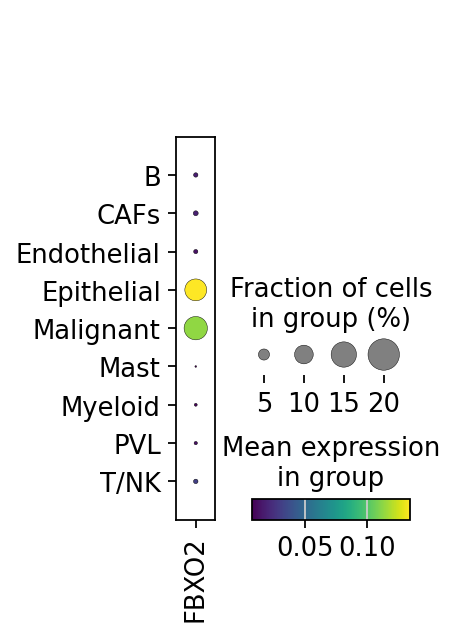

In [45]:
sc.pl.dotplot(adata, ['FBXO2'],cmap = 'viridis',groupby='celltype2', save=True)

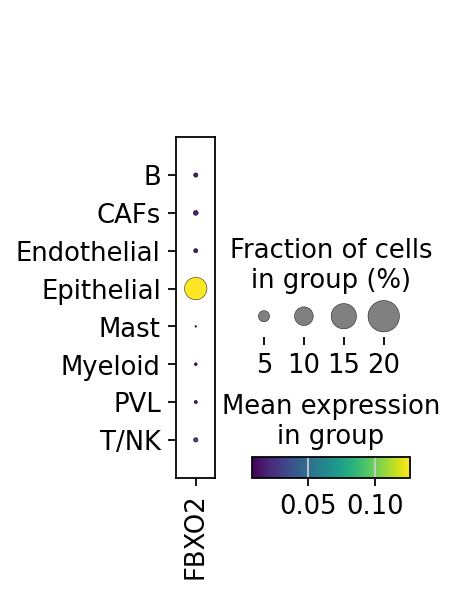

In [46]:
sc.pl.dotplot(adata, ['FBXO2'],cmap='viridis',groupby='celltype', save=True)

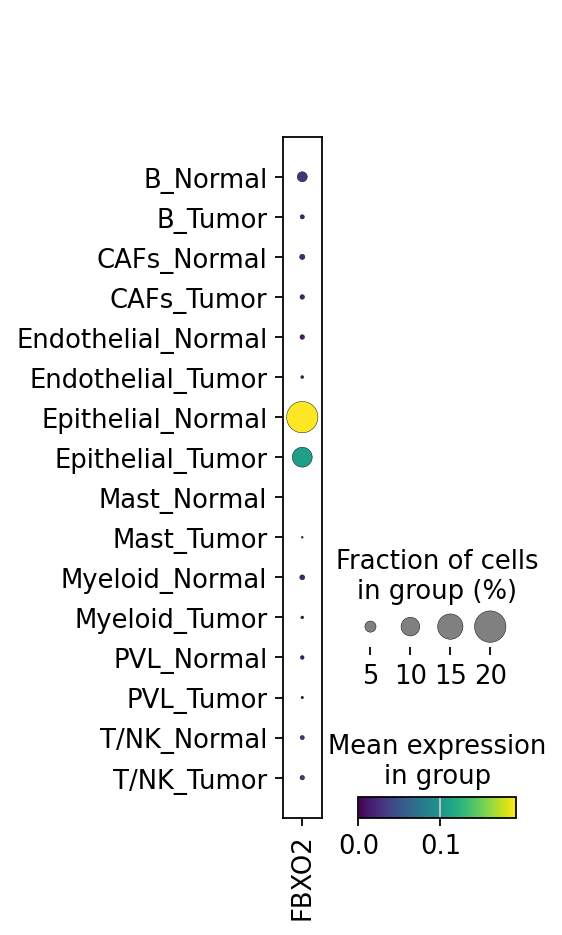

In [47]:
sc.pl.dotplot(adata, ['FBXO2'],cmap='viridis',groupby=['celltype','type'], save=True)

In [51]:
index = (adata.obs["celltype2"] == "Malignant") & (adata.obs["type"] == "Tumor")

In [52]:
Cancer = adata[index,:]

In [54]:
index = Cancer.raw[:,'FBXO2'].X
index = pd.DataFrame.sparse.from_spmatrix(index)
index = index.loc[:,0] >0
index = index.tolist()

In [55]:
Cancer.obs['Group'] = 'FBXO2-'
Cancer.obs['Group'][index] = 'FBXO2+'
Cancer.obs['Group'].value_counts()

Group
FBXO2-    50040
FBXO2+     7767
Name: count, dtype: int64

In [57]:
split = Cancer.obs['Group'].unique().tolist()
split

['FBXO2+', 'FBXO2-']

In [58]:
adata.obs["celltype3"] = adata.obs["celltype2"].to_list()
for i in split:
    index = adata.obs['cell_name'].isin(Cancer[Cancer.obs['Group'] == i,:].obs['cell_name'].to_list())
    adata.obs['celltype3'][index] = i + '_Malignant' 

In [61]:
adata.write_h5ad("./04adata_seurat.h5ad", compression="gzip")